This project analyzes the Telco Customer Churn dataset to identify key factors influencing customer churn. I will preprocess the data, explore it to find useful patterns, and build different machine learning models. By comparing their performance, we aim to find out which model works best for predicting customer churn.

In [181]:
#import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [182]:
# Load the Dataset
churn_data = pd.read_csv('Telco_Customer_Churn.csv')

### Data Exploration and Cleaning

In [184]:
# Print the shape of the dataset (rows and columns)
print(f"Number of Rows : {churn_data.shape[0]}\nNumber of Columns : {churn_data.shape[1]}")

Number of Rows : 7043
Number of Columns : 21


In [185]:
churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [186]:
churn_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [187]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Data Cleaning and EDA

In [189]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [190]:
# Drop the 'customerID' column 
churn_data= churn_data.drop(columns=['customerID'])

In [191]:
print("Updated number of columns: ",churn_data.shape[1])

Updated number of columns:  20


In [192]:
# Check for missing values in each column
churn_data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [193]:
# Convert only the first letter of each column name to lowercase
churn_data.columns = [col[0].lower() + col[1:] if len(col) > 1 else col.lower() for col in churn_data.columns]

In [194]:
churn_data.describe()

,seniorCitizen,tenure,monthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [195]:
#  Check for duplicated values in the dataset
churn_data.duplicated().sum()

22

In [196]:
# Remove duplicate rows from the dataset
churn_data = churn_data.drop_duplicates()

In [197]:
# Verify that all duplicates have been removed
churn_data.duplicated().sum()

0

In [198]:
churn_data.columns

Index(['gender', 'seniorCitizen', 'partner', 'dependents', 'tenure',
       'phoneService', 'multipleLines', 'internetService', 'onlineSecurity',
       'onlineBackup', 'deviceProtection', 'techSupport', 'streamingTV',
       'streamingMovies', 'contract', 'paperlessBilling', 'paymentMethod',
       'monthlyCharges', 'totalCharges', 'churn'],
      dtype='object')

In [199]:
churn_data['totalCharges'].head()

0      29.85
1     1889.5
2     108.15
3    1840.75
4     151.65
Name: totalCharges, dtype: object

In [200]:
# Convert 'totalCharges' to numeric
churn_data['totalCharges'] = pd.to_numeric(churn_data['totalCharges'], errors='coerce')

In [201]:
churn_data['totalCharges'].head()

0      29.85
1    1889.50
2     108.15
3    1840.75
4     151.65
Name: totalCharges, dtype: float64

In [202]:
# Check for any missing values after conversion
churn_data.isnull().sum()

gender               0
seniorCitizen        0
partner              0
dependents           0
tenure               0
phoneService         0
multipleLines        0
internetService      0
onlineSecurity       0
onlineBackup         0
deviceProtection     0
techSupport          0
streamingTV          0
streamingMovies      0
contract             0
paperlessBilling     0
paymentMethod        0
monthlyCharges       0
totalCharges        11
churn                0
dtype: int64

In [203]:
# Drop rows where 'totalCharges' is NaN (due to failed numeric conversion)
churn_data = churn_data.dropna(subset=['totalCharges'])

In [204]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7010 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7010 non-null   object 
 1   seniorCitizen     7010 non-null   int64  
 2   partner           7010 non-null   object 
 3   dependents        7010 non-null   object 
 4   tenure            7010 non-null   int64  
 5   phoneService      7010 non-null   object 
 6   multipleLines     7010 non-null   object 
 7   internetService   7010 non-null   object 
 8   onlineSecurity    7010 non-null   object 
 9   onlineBackup      7010 non-null   object 
 10  deviceProtection  7010 non-null   object 
 11  techSupport       7010 non-null   object 
 12  streamingTV       7010 non-null   object 
 13  streamingMovies   7010 non-null   object 
 14  contract          7010 non-null   object 
 15  paperlessBilling  7010 non-null   object 
 16  paymentMethod     7010 non-null   object 
 17  

In [205]:
# Print updated shape of the dataset after cleaning
print(f" Updated Number of Rows : {churn_data.shape[0]}\nNumber of Columns : {churn_data.shape[1]}")

 Updated Number of Rows : 7010
Number of Columns : 20


In [206]:
# Identify categorical columns in the dataset
categorical_cols = churn_data.select_dtypes(include=['object', 'category']).columns.tolist()
# Create a DataFrame showing unique values for each categorical column
unique_values = pd.DataFrame(churn_data[categorical_cols].apply(lambda col: col.unique()))
unique_values

,0
gender,"[Female, Male]"
partner,"[Yes, No]"
dependents,"[No, Yes]"
phoneService,"[No, Yes]"
multipleLines,"[No phone service, No, Yes]"
internetService,"[DSL, Fiber optic, No]"
onlineSecurity,"[No, Yes, No internet service]"
onlineBackup,"[Yes, No, No internet service]"
deviceProtection,"[No, Yes, No internet service]"
techSupport,"[No, Yes, No internet service]"


In [207]:
#showing unique values for paymentMethod column
churn_data[['paymentMethod']].apply(lambda col: col.unique())

,paymentMethod
0,Electronic check
1,Mailed check
2,Bank transfer (automatic)
3,Credit card (automatic)


In [208]:
churn_data.head()

,gender,seniorCitizen,partner,dependents,tenure,phoneService,multipleLines,internetService,onlineSecurity,onlineBackup,deviceProtection,techSupport,streamingTV,streamingMovies,contract,paperlessBilling,paymentMethod,monthlyCharges,totalCharges,churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Data Exploration

In [210]:
colors = ['#E0BBE4', '#D291BC', '#C48FBE', '#A678B0','#8E63A7','#724C9D','#5A3E91', '#422C77']


In [211]:
# Distribution of churn value
churn_data['churn'].value_counts()

churn
No     5153
Yes    1857
Name: count, dtype: int64

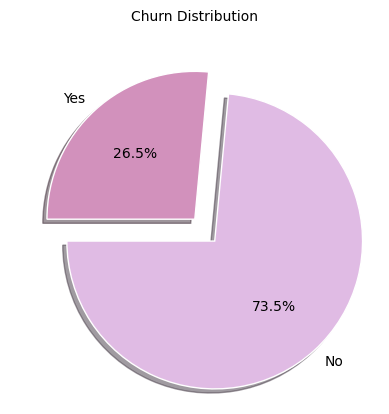

In [212]:
# visulaizing the distribution of churn variable
churn_data['churn'].value_counts().plot(
    kind='pie',
    colors=['#E0BBE4', '#D291BC'],
    autopct='%1.1f%%',
    startangle=180,
    labels=['No', 'Yes'], 
    explode=[0.2, 0],
    shadow=True,
    wedgeprops={'edgecolor': 'white'}
)

plt.title('Churn Distribution', fontsize=10, pad=10)
plt.ylabel('')  
plt.show()

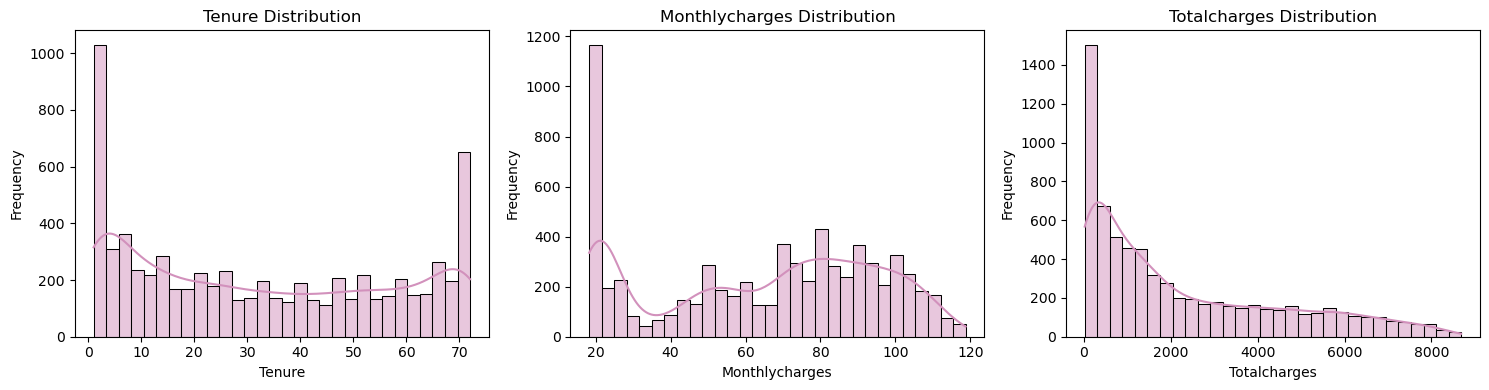

In [213]:
# Numerical Features Distribution
cols = ["tenure", "monthlyCharges", "totalCharges"] 
fig, axes = plt.subplots(1, 3, figsize=(15, 4)) 

for i, col in enumerate(cols):
    sns.histplot(churn_data[col], bins=30, kde=True, color="#D291BC", ax=axes[i])
    axes[i].set_title(f"{col.capitalize()} Distribution")
    axes[i].set_xlabel(col.capitalize())
    axes[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()


C:\Users\cmanc\AppData\Local\Temp\ipykernel_26604\2816781838.py:16: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=churn_data, x=col, palette=["#E0BBE4", "#D291BC"], ax=axes[i])
C:\Users\cmanc\AppData\Local\Temp\ipykernel_26604\2816781838.py:16: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=churn_data, x=col, palette=["#E0BBE4", "#D291BC"], ax=axes[i])
C:\Users\cmanc\AppData\Local\Temp\ipykernel_26604\2816781838.py:16: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=churn_data, x=col, palette=["#E0BBE4", "#D291BC"], ax=axes[i])
C:\Users\cmanc\AppData\Local\Temp\ipykernel_26604\2816781838.py:16: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may p

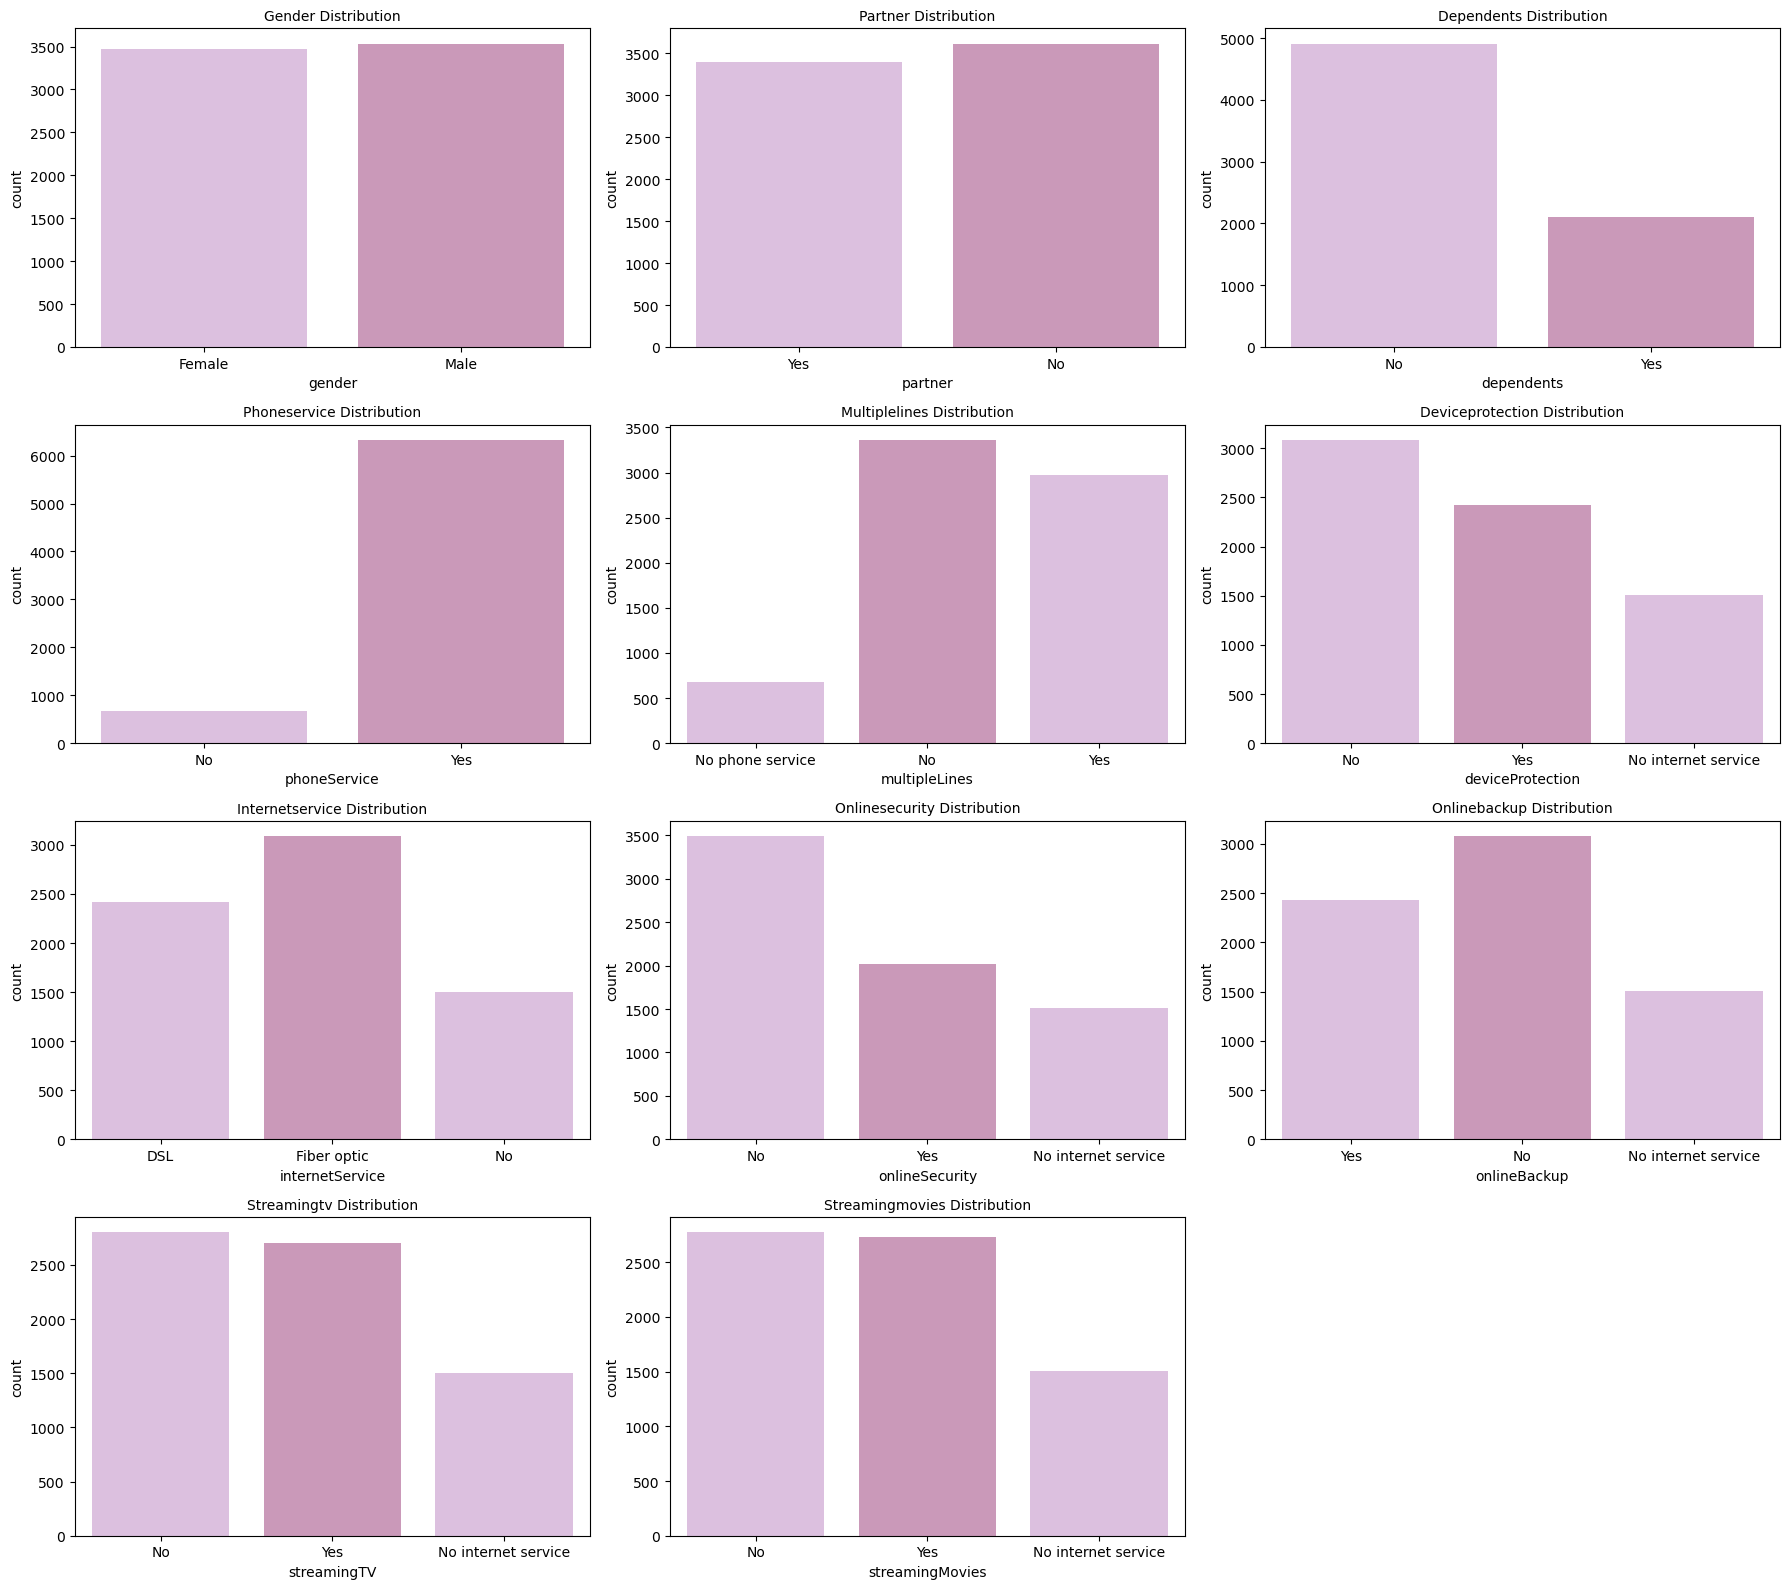

In [214]:
#Categorical Feature Distribution
import math
import seaborn as sns
import matplotlib.pyplot as plt

# List of categorical columns to visualize
columns = ['gender', 'partner', 'dependents', 'phoneService', 'multipleLines', 'deviceProtection', 'internetService', 'onlineSecurity','onlineBackup', 'streamingTV', 'streamingMovies']
cols_per_row = 3
total_plots = len(columns)
rows = math.ceil(total_plots / cols_per_row)

fig, axes = plt.subplots(rows, cols_per_row, figsize=(18, 4 * rows))
axes = axes.flatten() 

for i, col in enumerate(columns):
    sns.countplot(data=churn_data, x=col, palette=["#E0BBE4", "#D291BC"], ax=axes[i])
    # Clean title formatting
    axes[i].set_title(f"{col.replace('_', ' ').title()} Distribution", fontsize=10)
    axes[i].tick_params(axis='x', rotation=0)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


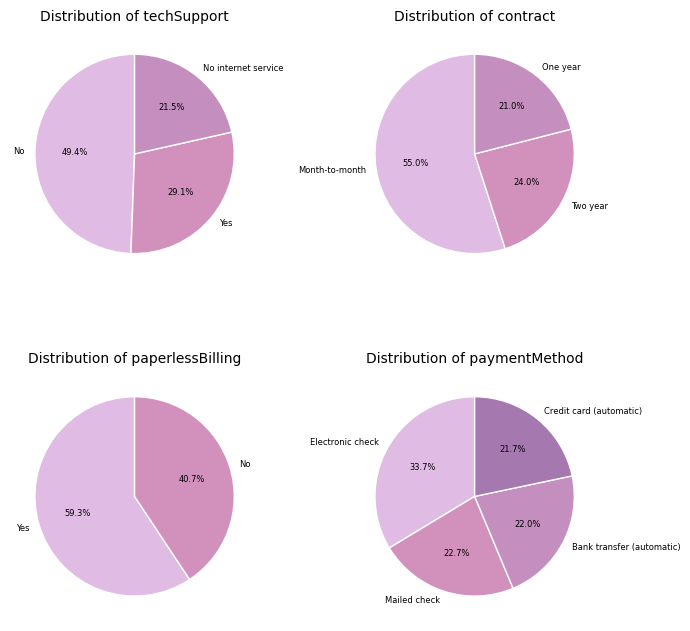

In [215]:
### Pie Chart Distribution of Service and Billing-Related Features
import matplotlib.pyplot as plt
import seaborn as sns

colors = ['#E0BBE4', '#D291BC', '#C48FBE', '#A678B0',
          '#8E63A7', '#724C9D', '#5A3E91', '#422C77']

fig, axes = plt.subplots(2, 2, figsize=(7, 7))  
axes = axes.flatten()

columns = ['techSupport', 'contract', 'paperlessBilling', 'paymentMethod']

for i, col in enumerate(columns):
    data = churn_data[col].value_counts()
    labels = data.index
    sizes = data.values

    pie_colors = colors[:len(labels)] if len(labels) <= len(colors) else [colors[j % len(colors)] for j in range(len(labels))]

    axes[i].pie(
        sizes,
        labels=labels,
        autopct='%1.1f%%',
        startangle=90,
        colors=pie_colors,
        wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
        textprops={'fontsize': 6}  
    )
    axes[i].set_title(f'Distribution of {col}', fontsize=10)

plt.tight_layout()
plt.show()


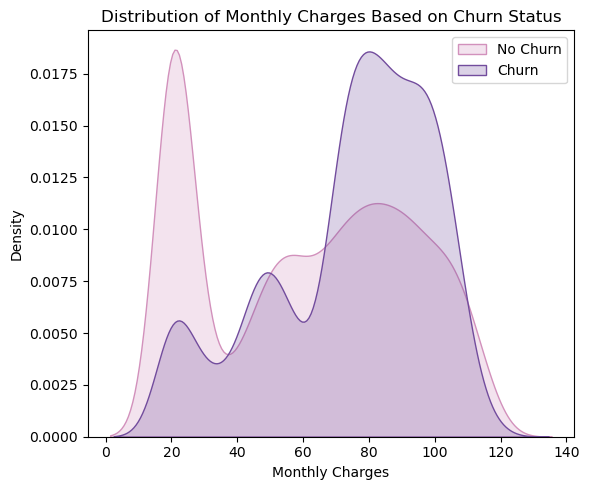

In [216]:
# KDE distributions of Monthly Charges for churned vs. non-churned customers
plt.figure(figsize=(6, 5))
sns.kdeplot(
    churn_data[churn_data["churn"] == 'No']['monthlyCharges'],
    shade=True,
    color='#D291BC',
    label="No Churn"
)

sns.kdeplot(
    churn_data[churn_data["churn"] == 'Yes']['monthlyCharges'],
    shade=True,
    color='#724C9D',
    label="Churn"
)

plt.legend(loc='upper right')
plt.xlabel("Monthly Charges")
plt.ylabel("Density")
plt.title('Distribution of Monthly Charges Based on Churn Status', fontsize=12)
plt.tight_layout()
plt.show()

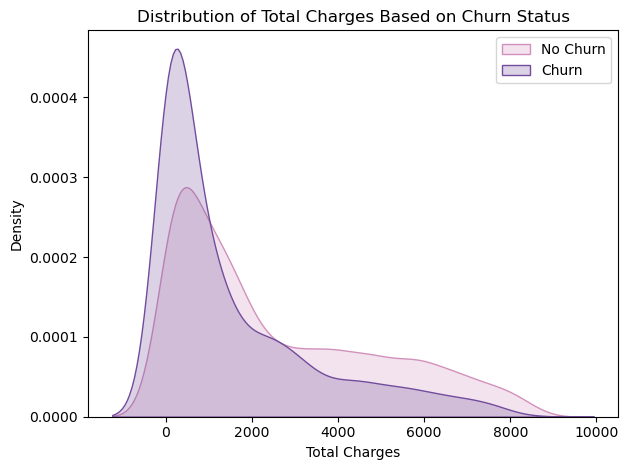

In [217]:
# Plot KDE distributions of Total Charges for churned vs. non-churned customers
sns.kdeplot(
    churn_data[churn_data['churn'] == 'No']['totalCharges'],
    shade=True,
    color='#D291BC',
    label="No Churn"
)

sns.kdeplot(
    churn_data[churn_data['churn'] == 'Yes']['totalCharges'],
    shade=True,
    color='#724C9D',
    label="Churn"
)

plt.legend(loc='upper right')
plt.xlabel('Total Charges')
plt.ylabel('Density')
plt.title("Distribution of Total Charges Based on Churn Status", fontsize=12)
plt.tight_layout()
plt.show()

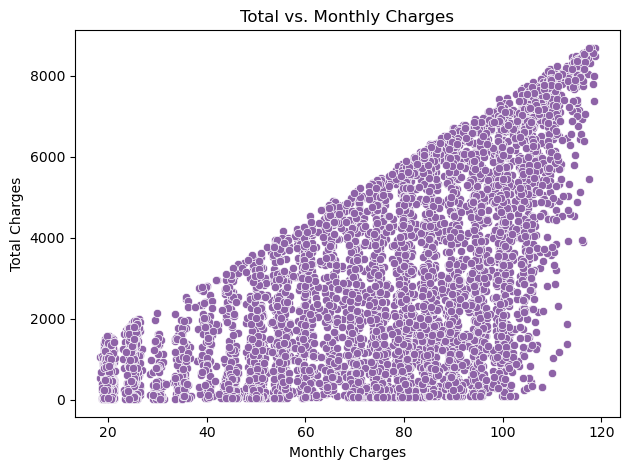

In [218]:
# Relation berween Monthly Charges and Total Charges
sns.scatterplot(data=churn_data, x='monthlyCharges', y='totalCharges', color='#8E63A7')  
plt.title("Total vs. Monthly Charges", fontsize=12)
plt.xlabel("Monthly Charges")
plt.ylabel("Total Charges")
plt.tight_layout()
plt.show()

In [219]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7010 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7010 non-null   object 
 1   seniorCitizen     7010 non-null   int64  
 2   partner           7010 non-null   object 
 3   dependents        7010 non-null   object 
 4   tenure            7010 non-null   int64  
 5   phoneService      7010 non-null   object 
 6   multipleLines     7010 non-null   object 
 7   internetService   7010 non-null   object 
 8   onlineSecurity    7010 non-null   object 
 9   onlineBackup      7010 non-null   object 
 10  deviceProtection  7010 non-null   object 
 11  techSupport       7010 non-null   object 
 12  streamingTV       7010 non-null   object 
 13  streamingMovies   7010 non-null   object 
 14  contract          7010 non-null   object 
 15  paperlessBilling  7010 non-null   object 
 16  paymentMethod     7010 non-null   object 
 17  

#### Encoding Categorical Variables to Numerical Values


In [221]:
# Normalize all string/object columns: lowercase and remove extra spaces
for col in churn_data.select_dtypes(include='object').columns:
    churn_data[col] = churn_data[col].str.strip().str.lower()


In [222]:
# Define a binary map for Yes/No responses
binary_map = {'yes': 1, 'no': 0}
# Map binary and gender values to numerical format
churn_data['gender'] = churn_data['gender'].map({'female': 0, 'male': 1})
churn_data['partner'] = churn_data['partner'].map(binary_map)
churn_data['dependents'] = churn_data['dependents'].map(binary_map)
churn_data['phoneService'] = churn_data['phoneService'].map(binary_map)
churn_data['paperlessBilling'] = churn_data['paperlessBilling'].map(binary_map)
churn_data['churn'] = churn_data['churn'].map(binary_map)

# Encode categorical variables with multiple categories
churn_data['multipleLines'] = churn_data['multipleLines'].map({
    'no': 0,
    'yes': 1,
    'no phone service': 2
})

churn_data['internetService'] = churn_data['internetService'].map({
    'dsl': 0,
    'fiber optic': 1,
    'no': 2
})

churn_data['onlineSecurity'] = churn_data['onlineSecurity'].map({
    'no': 0,
    'yes': 1,
    'no internet service': 2
})

churn_data['onlineBackup'] = churn_data['onlineBackup'].map({
    'no': 0,
    'yes': 1,
    'no internet service': 2
})

churn_data['deviceProtection'] = churn_data['deviceProtection'].map({
    'no': 0,
    'yes': 1,
    'no internet service': 2
})

churn_data['techSupport'] = churn_data['techSupport'].map({
    'no': 0,
    'yes': 1,
    'no internet service': 2
})

churn_data['streamingTV'] = churn_data['streamingTV'].map({
    'no': 0,
    'yes': 1,
    'no internet service': 2
})

churn_data['streamingMovies'] = churn_data['streamingMovies'].map({
    'no': 0,
    'yes': 1,
    'no internet service': 2
})

churn_data['contract'] = churn_data['contract'].map({
    'month-to-month': 0,
    'one year': 1,
    'two year': 2
})

churn_data['paymentMethod'] = churn_data['paymentMethod'].map({
    'electronic check': 0,
    'mailed check': 1,
    'bank transfer (automatic)': 2,
    'credit card (automatic)': 3
})


In [223]:
churn_data.head()

,gender,seniorCitizen,partner,dependents,tenure,phoneService,multipleLines,internetService,onlineSecurity,onlineBackup,deviceProtection,techSupport,streamingTV,streamingMovies,contract,paperlessBilling,paymentMethod,monthlyCharges,totalCharges,churn
0,0,0,1,0,1,0,2,0,0,1,0,0,0,0,0,1,0,29.85,29.85,0
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,1,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,1,53.85,108.15,1
3,1,0,0,0,45,0,2,0,1,0,1,1,0,0,1,0,2,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,0,70.70,151.65,1


In [224]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7010 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7010 non-null   int64  
 1   seniorCitizen     7010 non-null   int64  
 2   partner           7010 non-null   int64  
 3   dependents        7010 non-null   int64  
 4   tenure            7010 non-null   int64  
 5   phoneService      7010 non-null   int64  
 6   multipleLines     7010 non-null   int64  
 7   internetService   7010 non-null   int64  
 8   onlineSecurity    7010 non-null   int64  
 9   onlineBackup      7010 non-null   int64  
 10  deviceProtection  7010 non-null   int64  
 11  techSupport       7010 non-null   int64  
 12  streamingTV       7010 non-null   int64  
 13  streamingMovies   7010 non-null   int64  
 14  contract          7010 non-null   int64  
 15  paperlessBilling  7010 non-null   int64  
 16  paymentMethod     7010 non-null   int64  
 17  

#### Outlier Detection Using the IQR Method


In [226]:
# Select continuous numeric columns only
numeric_cols = ['tenure', 'monthlyCharges', 'totalCharges']

# Check for outliers using IQR
outliers = {}
for col in numeric_cols:
    Q1 = churn_data[col].quantile(0.25)
    Q3 = churn_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[col] = churn_data[(churn_data[col] < lower_bound) | (churn_data[col] > upper_bound)]

# Display columns with outliers
for col, outlier_rows in outliers.items():
    print(f"Column: {col}, Outliers: {len(outlier_rows)}")


Column: tenure, Outliers: 0
Column: monthlyCharges, Outliers: 0
Column: totalCharges, Outliers: 0


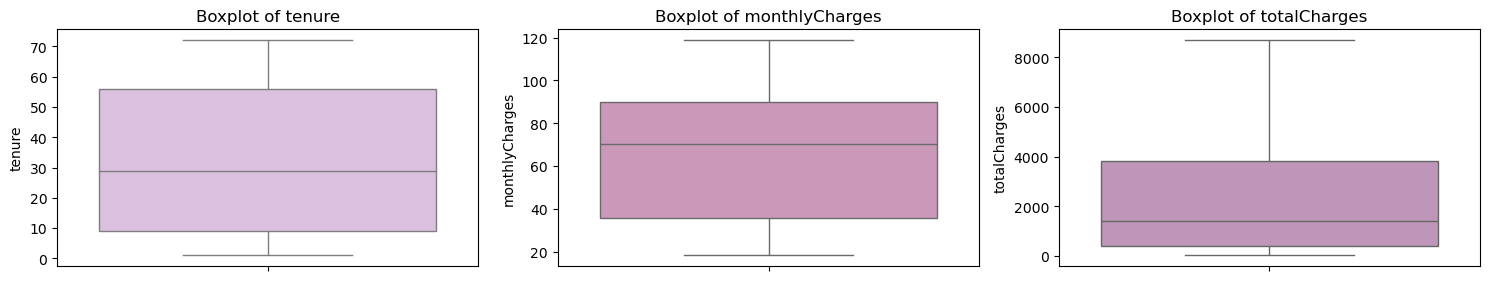

In [227]:
# Boxplot Visualization of Outliers in Numerical Features
import matplotlib.pyplot as plt  

def plot_boxplots(churn_data, columns):
    plt.figure(figsize=(15, 8))
    for i, col in enumerate(columns):
        plt.subplot(3, 3, i + 1)
        sns.boxplot(y=churn_data[col], color=colors[i % 3])
        plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

plot_boxplots(churn_data, numeric_cols)

##### Correlation Matrix

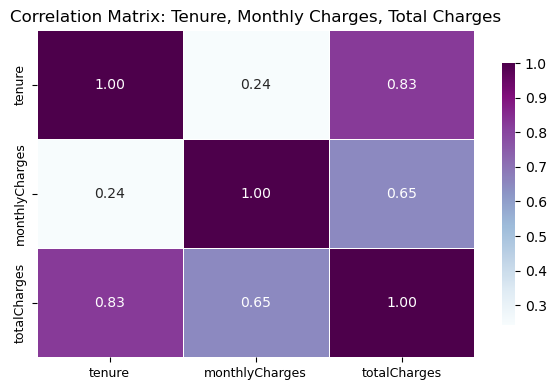

In [229]:
#Select specific Numerical columns
selected_cols = ['tenure', 'monthlyCharges', 'totalCharges']

# Compute correlation matrix
corr_matrix = churn_data[selected_cols].corr()

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='BuPu',
    fmt=".2f",
    linewidths=0.5,
    xticklabels=selected_cols,
    yticklabels=selected_cols,
    cbar_kws={'shrink': 0.8}
)

# Reduce tick label font size
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)

plt.title("Correlation Matrix: Tenure, Monthly Charges, Total Charges", fontsize=12)
plt.tight_layout()
plt.show()


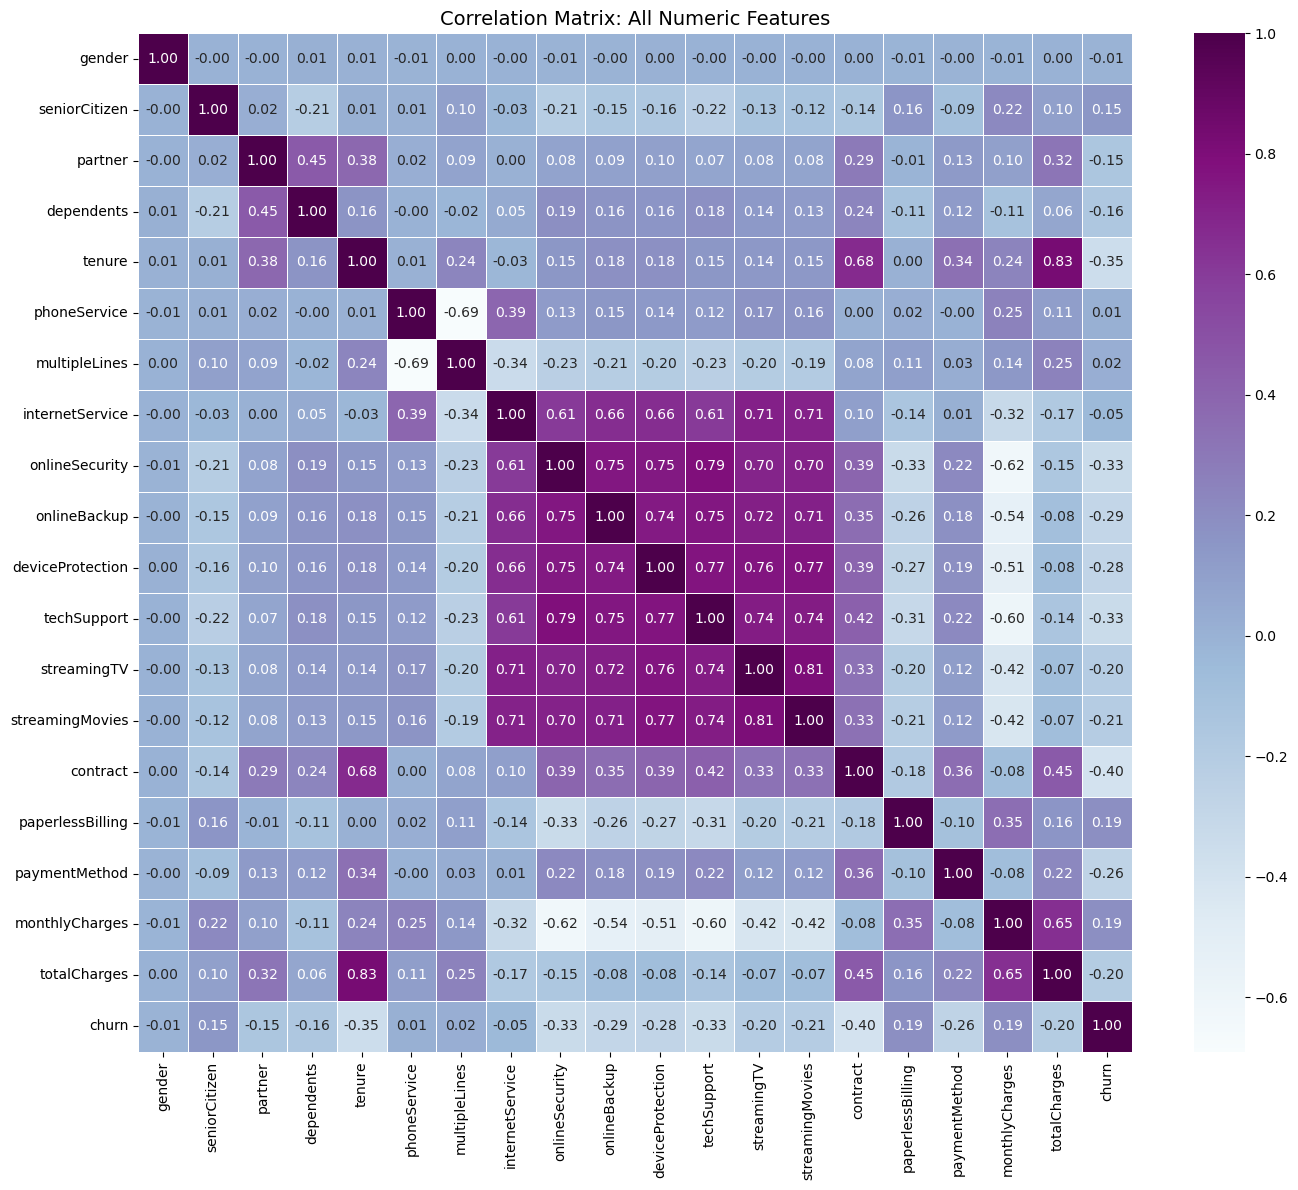

In [230]:
# correlation matrix of all columns
corr_matrix = churn_data.corr()

# Plot heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, cmap='BuPu', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix: All Numeric Features", fontsize=14)
plt.tight_layout()
plt.show()

### Splitting Data into Features and Target


In [232]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import SMOTE

# 1. Define features and target
X = churn_data.drop('churn', axis=1)
y = churn_data['churn']

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 3. Apply SMOTE to balance the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# 4. Scale the SMOTE-balanced training set and test set
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)  # Test set remains unchanged

# 5. Set class labels
target_names = ['No Churn', 'Churn']

# Check the shape of the splits
print("Training set:", X_train.shape)
print("Testing set :", X_test.shape)

Training set: (5608, 19)
Testing set : (1402, 19)


###  Model Implementation
Multiple models are implemented to predict churn. These include:
- Logistic Regression
- Random Forest
- Gradient Boosting
##### Each model is trained on the dataset, and its performance is evaluated using accuracy, precision, recall, and F1-score.

Logistic Regression

Best Hyperparameters: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Test Accuracy of Optimal Model: 0.7589

***LOGISTIC REGRESSION***

::Confusion Matrix::
[[796 235]
 [103 268]]


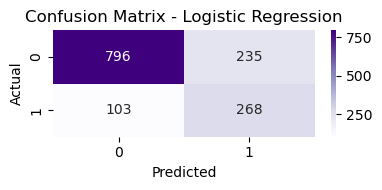


::Classification Report::
              precision    recall  f1-score   support

    No Churn       0.89      0.77      0.82      1031
       Churn       0.53      0.72      0.61       371

    accuracy                           0.76      1402
   macro avg       0.71      0.75      0.72      1402
weighted avg       0.79      0.76      0.77      1402


::Accuracy on Test Set:: 0.76


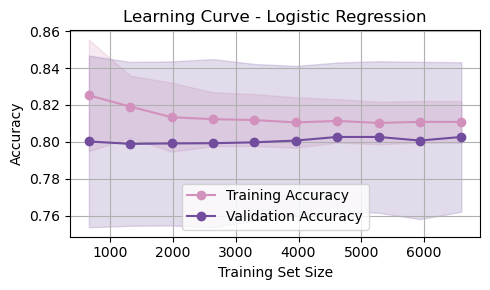

In [235]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid for Grid Search
param_grid = {
    "C": [0.01, 0.1, 1, 10, 100],       # Regularization strength
    "penalty": ["l2"],                 # L2 regularization
    "solver": ["liblinear"]            # Works with L2 and small datasets
}

#  Run GridSearchCV with Logistic Regression
grid_search = GridSearchCV(
    LogisticRegression(random_state=100),
    param_grid,
    cv=5,
    scoring="accuracy"
)
grid_search.fit(X_train_scaled, y_train_smote)

# Get the best model and test accuracy
best_model = grid_search.best_estimator_
print(f"Best Hyperparameters: {grid_search.best_params_}")

test_accuracy = best_model.score(X_test_scaled, y_test)
print(f"Test Accuracy of Optimal Model: {test_accuracy:.4f}")

# Make predictions
predict = best_model.predict(X_test_scaled)

print("\n***LOGISTIC REGRESSION***")
print("\n::Confusion Matrix::")
print(confusion_matrix(y_test, predict))
plt.figure(figsize=(4, 2))  
sns.heatmap(confusion_matrix(y_test, predict), annot=True, fmt='d', cmap='Purples')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()
print("\n::Classification Report::")
print(classification_report(y_test, predict, target_names=target_names))

accuracy = accuracy_score(y_test, predict)
print(f"\n::Accuracy on Test Set:: {accuracy:.2f}")

from sklearn.model_selection import learning_curve
# Create learning curve
logreg = LogisticRegression(C=100, penalty='l2', solver='liblinear', random_state=100)

train_sizes, train_scores, test_scores = learning_curve(
    estimator=logreg,
    X=X_train_scaled,
    y=y_train_smote,   
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    shuffle=True,
    random_state=42
)

# Calculate mean and std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot
plt.figure(figsize=(5, 3))
plt.plot(train_sizes, train_mean, 'o-', color="#D291BC", label='Training Accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color="#D291BC")

plt.plot(train_sizes, test_mean, 'o-', color="#724C9D", label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color="#724C9D")

plt.title('Learning Curve - Logistic Regression', fontsize=12)
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()

Random Forest

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Hyperparameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}

*** RANDOM FOREST ***

::Confusion Matrix::


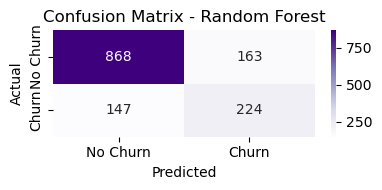


::Classification Report::
              precision    recall  f1-score   support

    No Churn       0.86      0.84      0.85      1031
       Churn       0.58      0.60      0.59       371

    accuracy                           0.78      1402
   macro avg       0.72      0.72      0.72      1402
weighted avg       0.78      0.78      0.78      1402


::Accuracy on Test Set:: 0.78


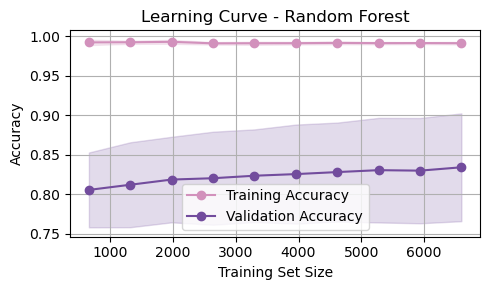

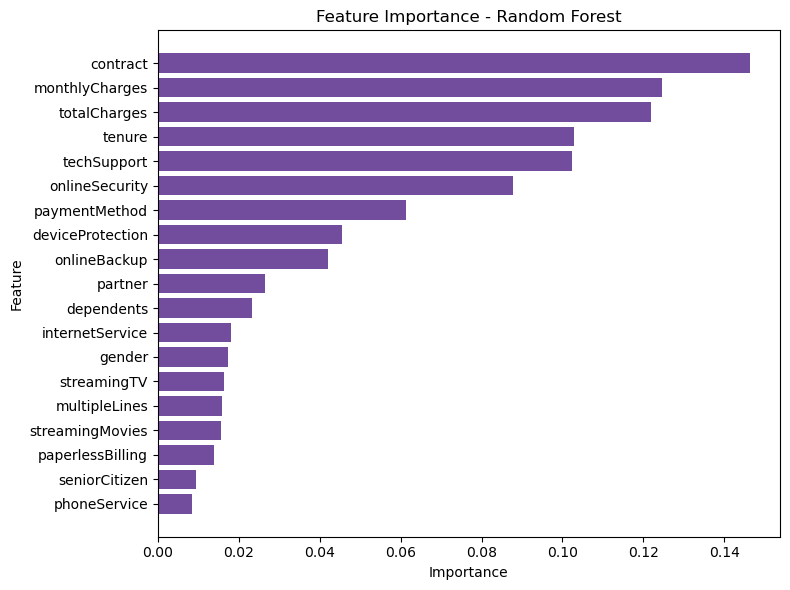

In [237]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define hyperparameter search space
param_dist = {
    "n_estimators": [int(x) for x in np.linspace(100, 500, 10)],
    "max_depth": [None, 10, 20, 30, 40],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2"],
    "bootstrap": [True, False]
}

# Initialize Random Forest
rf = RandomForestClassifier(random_state=100)

# Perform Randomized Search
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=100,             
    cv=5,
    verbose=1,
    random_state=100,
    n_jobs=-1,
    scoring='accuracy'
)

# Train on SMOTE-balanced and scaled data
random_search.fit(X_train_scaled, y_train_smote)

# Best model
best_rf_model = random_search.best_estimator_
print("Best Hyperparameters:", random_search.best_params_)

# Predictions
y_pred_rf = best_rf_model.predict(X_test_scaled)

# Evaluation
print("\n*** RANDOM FOREST ***")
print("\n::Confusion Matrix::")
plt.figure(figsize=(4, 2))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Purples',
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

print("\n::Classification Report::")
print(classification_report(y_test, y_pred_rf, target_names=target_names))

accuracy = accuracy_score(y_test, y_pred_rf)
print(f"\n::Accuracy on Test Set:: {accuracy:.2f}")

from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    estimator=best_rf_model,
    X=X_train_scaled,
    y=y_train_smote,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    shuffle=True,
    random_state=42
)

# Calculate mean and std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot
plt.figure(figsize=(5, 3))
plt.plot(train_sizes, train_mean, 'o-', color="#D291BC", label='Training Accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color="#D291BC")

plt.plot(train_sizes, test_mean, 'o-', color="#724C9D", label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color="#724C9D")

plt.title('Learning Curve - Random Forest', fontsize=12)
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()

# Get feature importances from the model
importances = best_rf_model.feature_importances_

# Get feature names
feature_names = X.columns  

# Create a DataFrame for visualization
feat_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=True)

# Plot horizontal bar chart
plt.figure(figsize=(8, 6))
plt.barh(feat_importance_df['Feature'], feat_importance_df['Importance'], color='#724C9D')
plt.title('Feature Importance - Random Forest', fontsize=12)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


Gradient Boost

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}

::Accuracy of Optimized Gradient Boosting:: 0.7746

***GRADIENT BOOSTING***

::Confusion Matrix::


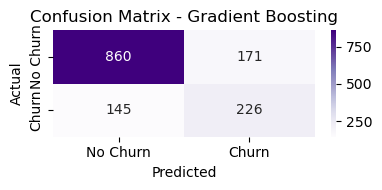


::Classification Report::
              precision    recall  f1-score   support

    No Churn       0.86      0.83      0.84      1031
       Churn       0.57      0.61      0.59       371

    accuracy                           0.77      1402
   macro avg       0.71      0.72      0.72      1402
weighted avg       0.78      0.77      0.78      1402



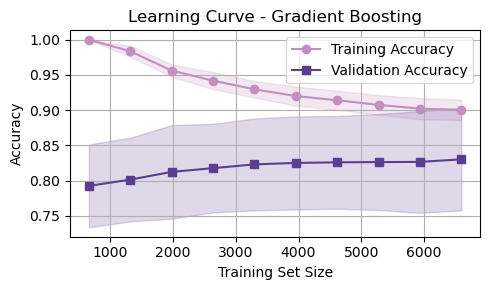

In [239]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Initialize Gradient Boosting model
gb = GradientBoostingClassifier(random_state=100)

# Define hyperparameter grid for tuning
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 4],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Apply GridSearchCV
grid_search = GridSearchCV(
    estimator=gb,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Train on SMOTE-balanced and scaled data
grid_search.fit(X_train_scaled, y_train_smote)

# Best model from Grid Search
best_gb_model = grid_search.best_estimator_
print(f"Best Hyperparameters: {grid_search.best_params_}")

# Predict on original test set
y_pred = best_gb_model.predict(X_test_scaled)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\n::Accuracy of Optimized Gradient Boosting:: {accuracy:.4f}")

# Confusion Matrix Heatmap
print("\n***GRADIENT BOOSTING***")
print("\n::Confusion Matrix::")
plt.figure(figsize=(4, 2))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Purples',
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title("Confusion Matrix - Gradient Boosting")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# Classification Report
print("\n::Classification Report::")
print(classification_report(y_test, y_pred, target_names=target_names))

# Learning Curve for Gradient Boosting
train_sizes, train_scores, test_scores = learning_curve(
    estimator=best_gb_model,
    X=X_train_scaled,
    y=y_train_smote,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    shuffle=True,
    random_state=42
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(5, 3))
plt.plot(train_sizes, train_mean, label='Training Accuracy', color='#C48FBE', marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='#C48FBE')

plt.plot(train_sizes, test_mean, label='Validation Accuracy', color='#5A3E91', marker='s')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color='#5A3E91')

plt.title('Learning Curve - Gradient Boosting', fontsize=12)
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()

### AUC & ROC Curve for All 3 Models

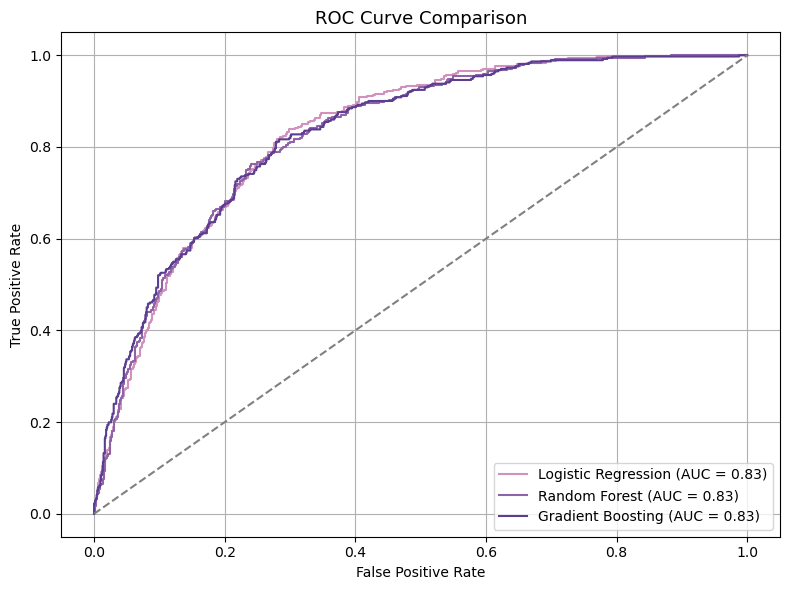

In [241]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predict probabilities
lr_probs = best_model.predict_proba(X_test_scaled)[:, 1]
rf_probs = best_rf_model.predict_proba(X_test_scaled)[:, 1]
gb_probs = best_gb_model.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
gb_fpr, gb_tpr, _ = roc_curve(y_test, gb_probs)

# Calculate AUC scores
lr_auc = roc_auc_score(y_test, lr_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
gb_auc = roc_auc_score(y_test, gb_probs)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(lr_fpr, lr_tpr, label=f'Logistic Regression (AUC = {lr_auc:.2f})', color='#D291BC')
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})', color='#8E63A7')
plt.plot(gb_fpr, gb_tpr, label=f'Gradient Boosting (AUC = {gb_auc:.2f})', color='#5A3E91')

plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.title('ROC Curve Comparison', fontsize=13)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


Model Performance Summary:

              Model  Accuracy  Precision  Recall  F1-Score    AUC
Logistic Regression    0.7589     0.5328  0.7224    0.6133 0.8318
      Random Forest    0.7789     0.5788  0.6038    0.5910 0.8286
  Gradient Boosting    0.7746     0.5693  0.6092    0.5885 0.8310


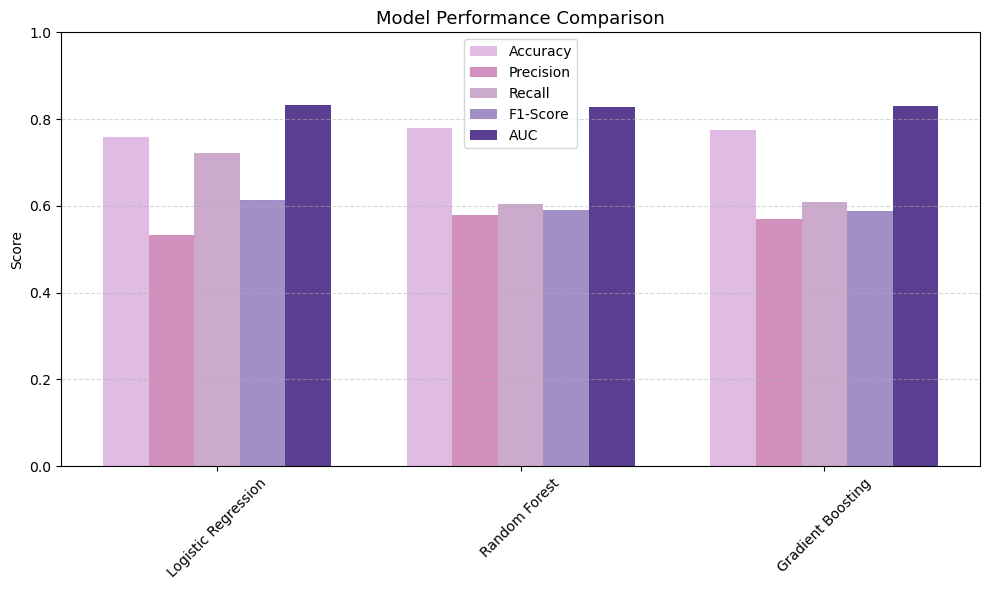

In [242]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score
)

# Define your trained models
models = {
    'Logistic Regression': best_model,
    'Random Forest': best_rf_model,
    'Gradient Boosting': best_gb_model,
}

# Store metrics
metrics = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": [],
    "AUC": []
}

# Evaluate each model
for name, model in models.items():
    y_pred = model.predict(X_test_scaled)

    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test_scaled)[:, 1]
    else:
        y_prob = model.decision_function(X_test_scaled)

    metrics["Model"].append(name)
    metrics["Accuracy"].append(accuracy_score(y_test, y_pred))
    metrics["Precision"].append(precision_score(y_test, y_pred))
    metrics["Recall"].append(recall_score(y_test, y_pred))
    metrics["F1-Score"].append(f1_score(y_test, y_pred))
    metrics["AUC"].append(roc_auc_score(y_test, y_prob))

# Convert to DataFrame
metrics_df = pd.DataFrame(metrics)
metrics_df[["Accuracy", "Precision", "Recall", "F1-Score", "AUC"]] = metrics_df[
    ["Accuracy", "Precision", "Recall", "F1-Score", "AUC"]
].round(4)

# Sort by F1-Score
metrics_df = metrics_df.sort_values(by="F1-Score", ascending=False)

# Print the table
print("Model Performance Summary:\n")
print(metrics_df.to_string(index=False))

# -------------------- Visualization --------------------


purple_palette = ['#E0BBE4', '#D291BC', '#CBAACB', '#A18FC6', '#5A3E91']

# Plot grouped bar chart
plt.figure(figsize=(10, 6))
bar_width = 0.15
x = range(len(metrics_df))

# Metric bars
for i, metric in enumerate(["Accuracy", "Precision", "Recall", "F1-Score", "AUC"]):
    plt.bar(
        [p + bar_width * i for p in x],
        metrics_df[metric],
        width=bar_width,
        label=metric,
        color=purple_palette[i % len(purple_palette)]
    )


plt.xticks([p + 2 * bar_width for p in x], metrics_df["Model"], rotation=45)
plt.ylabel("Score")
plt.title("Model Performance Comparison", fontsize=13)
plt.ylim(0, 1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
